# Radioactive Counting Experiment: 100 points 1 second

## Load required libraries

In [150]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
# For plotting
import matplotlib.pyplot as plt

from scipy.special import factorial

### Software Setup Parameter

In [151]:
# numbber of points
m = 100

# number of length of counting time
t_length = 1

## Load data for case without paper and with paper

In [152]:
t1, R1 = np.genfromtxt(f"data/2020-09-29-{m}pts{t_length}sec.csv", delimiter=',', unpack=True)
print("t1 = ", t1)
print("R1 = ", R1)
print()

t2, R2 = np.genfromtxt(f'data/2020-09-29-{m}pts{t_length}sec_withPaper.csv', delimiter=',', unpack=True)
print("t2 = ", t2)
print("R2 = ", R2)

t1 =  [ 0.        1.000186  2.00159   2.999939  4.002037  4.999804  6.000494
  7.001096  8.001252  9.000866 10.000428 10.999666 12.000445 13.000404
 14.000527 15.000671 16.000028 17.001712 18.001362 19.00073  20.000916
 20.999938 22.000084 23.000913 24.000035 24.999802 26.001349 26.999921
 28.001118 29.001539 29.99997  31.000068 32.001235 33.000772 34.001007
 35.001056 36.00117  37.00161  38.000325 39.00056  40.001882 41.00154
 42.001519 43.000473 44.001638 45.000452 46.002759 47.000746 48.000767
 49.001283 50.00145  51.000899 52.000466 53.001194 54.001651 55.002798
 56.001922 57.002262 58.000993 59.000998 60.000997 61.007342 62.002809
 63.001708 64.003482 65.00066  66.00284  67.001191 68.001992 69.000986
 70.001214 71.000885 72.001361 73.002092 74.002281 75.002109 76.002049
 77.002379 78.002402 79.001398 80.003813 81.001513 82.001938 83.002191
 84.007254 85.001345 86.001285 87.003118 88.01962  89.049762 90.001702
 91.00321  92.002462 93.002034 94.052715 95.00319  96.001934 97.003136
 

## Analysis Computation

In [153]:
# now check that it worked
mean1 = np.mean(R1)
stdev1 = np.std(R1, ddof=1)
print('Without paper: mean : ' + str(np.around(mean1, decimals=2)) + 
      ', standard devation: ' + str(np.around(stdev1, decimals=2)))
print()

# now check that it worked
mean2 = np.mean(R2)
stdev2 = np.std(R2, ddof=1)
print('With paper: mean: ' + str(np.around(mean2, decimals=2)) + 
      ', standard devation: ' + str(np.around(stdev2, decimals=2)))
print()

# find range of counts that includes 68 counts from the mean for R1
counts = 0
deltaRange = 0
while(counts <= 68):
    maxRange = int(mean1) + deltaRange
    minRange = int(mean1) - deltaRange
    deltaRange +=0.1
    counts = R1[np.logical_and(R1 > minRange, R1 < maxRange)].size

print(f"R1: Manual Counting of range (<=68 counts); minRange = {minRange+1:.3}, maxRange = {maxRange-1:.3}, counts = {R1[np.logical_and(R1 > minRange+1, R1 < maxRange-1)].size}")
print(f"R1: Using std dev for range (68 %); minRange = {mean1 - stdev1:.3}, maxRange = {mean1 + stdev1:.3}, counts = {R1[np.logical_and(R1 > mean1 - stdev1, R1 < mean1 + stdev1)].size}")

# find range of counts that includes 68 counts from the mean for R2
counts = 0
deltaRange = 0
while(counts <= 68):
    maxRange = int(mean2) + deltaRange
    minRange = int(mean2) - deltaRange
    deltaRange +=0.1
    counts = R1[np.logical_and(R2 > minRange, R2 < maxRange)].size
print(f"R2: Manual Counting of range (<=68 counts); minRange = {minRange+1:.3}, maxRange = {maxRange-1:.3}, counts = {R2[np.logical_and(R2 > minRange+1, R2 < maxRange-1)].size}")
print(f"R2: Using std dev for range (68 %); minRange = {mean2 - stdev2:.3}, maxRange = {mean2 + stdev2:.3}, counts = {R2[np.logical_and(R2 > mean2 - stdev2, R2 < mean2 + stdev2)].size}")
print()

print("alpha1 = ", stdev1 / np.sqrt(100))
print("alpha2 = ", stdev2 / np.sqrt(100))

Without paper: mean : 6.49, standard devation: 2.52

With paper: mean: 6.86, standard devation: 2.48

R1: Manual Counting of range (<=68 counts); minRange = 4.0, maxRange = 8.0, counts = 65
R1: Using std dev for range (68 %); minRange = 3.97, maxRange = 9.01, counts = 73
R2: Manual Counting of range (<=68 counts); minRange = 4.9, maxRange = 7.1, counts = 44
R2: Using std dev for range (68 %); minRange = 4.38, maxRange = 9.34, counts = 71

alpha1 =  0.2520601980367853
alpha2 =  0.24823416771307297


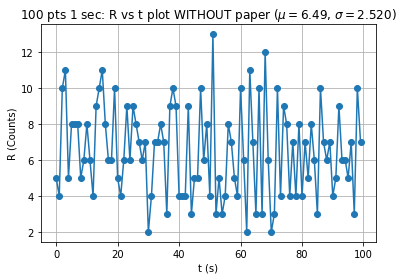

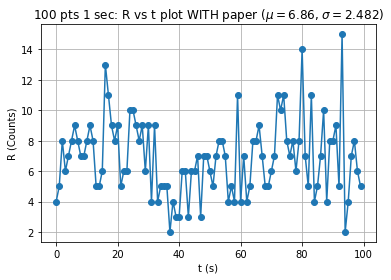

In [154]:
# and plot the data to have a look
plt.plot(t1,R1, "-o")
plt.title(f'{m} pts {t_length} sec: R vs t plot WITHOUT paper (' + r'$\mu=$' + str(mean1)[:5] + ', ' + r'$\sigma=$' + str(stdev1)[:5] + ')')
plt.xlabel('t (s)')
plt.ylabel('R (Counts)')
plt.grid(which='major', axis='both')
plt.show()

# and plot the data to have a look
plt.plot(t2,R2, "-o")
plt.title(f'{m} pts {t_length} sec: R vs t plot WITH paper (' + r'$\mu=$' + str(mean2)[:5] + ', ' + r'$\sigma=$' + str(stdev2)[:5] + ')')
plt.xlabel('t (s)')
plt.ylabel('R (Counts)')
plt.grid(which='major', axis='both')
plt.show()

## Plot the histogram

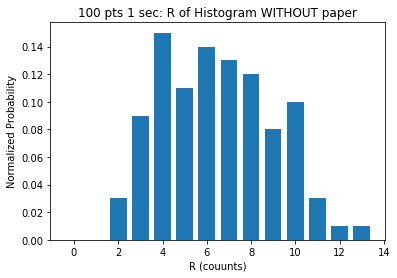

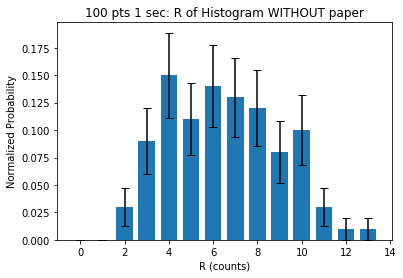

In [155]:
# without paper
# plot histogram
offset = 2
bins = np.arange(np.min(R1) - offset, np.max(R1) + offset) - 0.5
counts, bins, patches = plt.hist(R1, bins=bins, density=True, rwidth=0.75)
plt.title(f'{m} pts {t_length} sec: R of Histogram WITHOUT paper')
plt.xlabel('R (couunts)')
plt.ylabel('Normalized Probability')
plt.show()

# add the error bars
counts, bins, patches = plt.hist(R1, bins=bins, density=True, rwidth=0.75)
counts_err = np.sqrt(counts) / np.sqrt(t1.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITHOUT paper')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.show()


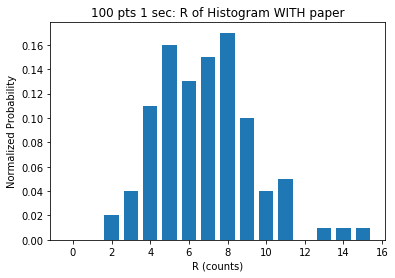

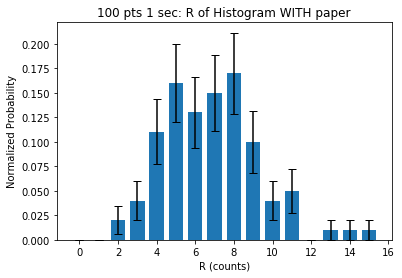

In [156]:
# with Paper

# plot histogram
offset = 2
bins = np.arange(np.min(R2) - offset, np.max(R2) + offset) - 0.5
counts, bins, patches = plt.hist(R2, bins=bins, density=True, rwidth=0.75)
plt.title(f'{m} pts {t_length} sec: R of Histogram WITH paper')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.show()

# add the error bars
counts, bins, patches = plt.hist(R2, bins=bins, density=True, rwidth=0.75)
counts_err = np.sqrt(counts) / np.sqrt(t2.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITH paper')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.show()

## Poisson Model

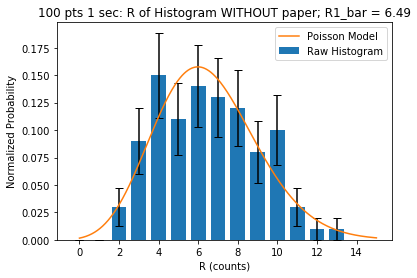

In [157]:
# without paper
# plot histogram
offset = 2
bins = np.arange(np.min(R1) - offset, np.max(R1) + offset) - 0.5

# add the error bars
counts, bins, patches = plt.hist(R1, bins=bins, density=True, rwidth=0.75, label="Raw Histogram")
counts_err = np.sqrt(counts) / np.sqrt(t1.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

x_n_dist = np.linspace(np.min(R1) - offset, np.max(R1) + offset, 1000)
#pdf = norm.pdf(x_n_dist, loc=mean1, scale=stdev1) # this is for gaussian
pdf = np.exp(-mean1)*np.power(mean1, x_n_dist)/factorial(x_n_dist)

plt.plot(x_n_dist, pdf, label="Poisson Model");

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITHOUT paper; R1_bar = {mean1:.3}')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.legend()
plt.show()


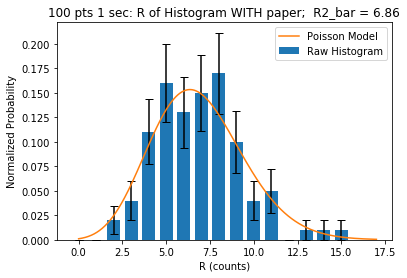

In [160]:
# without paper
# plot histogram
offset = 2
bins = np.arange(np.min(R2) - offset, np.max(R2) + offset) - 0.5

# add the error bars
counts, bins, patches = plt.hist(R2, bins=bins, density=True, rwidth=0.75, label="Raw Histogram")
counts_err = np.sqrt(counts) / np.sqrt(t2.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

x_n_dist = np.linspace(np.min(R2) - offset, np.max(R2) + offset, 1000)
#pdf = norm.pdf(x_n_dist, loc=mean1, scale=stdev1) # this is for gaussian
pdf = np.exp(-mean2)*np.power(mean2, x_n_dist)/factorial(x_n_dist)

plt.plot(x_n_dist, pdf, label="Poisson Model");

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITH paper;  R2_bar = {mean2:.3}')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.legend()
plt.show()
